In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px
import spacy

# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
df = pd.read_csv("year_authors.csv",index_col=0)
authors = []
names_to_exclude = ['dubna', 'japan','infn','department of physics',
                    'the netherlands','trieste','bonn','ukraine','heidelberg',
                    'australia','stsci','eso','korea','switzerland', 'israel',
                    'canada','mexico', 'caltech','poland', 'cambridge', 'spain',
                    'garching', 'india', 'uk', 'et al', 'moscow', 'usa', 'france',
                    'russia', 'italy', 'germany','brazil','astronomy',
                    'd  collaboration', 'the opal collaboration','the babar collaboration',
                    'madrid', 'berkeley', 'mit', 'astrophysics', 'cfa', 'bangalore',
                    'chile', 'princeton', 'china', 'nasa gsfc', 'beijing', 'argentina',
                    'edinburgh','nrao','roma']

df = df.drop(names_to_exclude)

for col in df.columns:
    top_authors = [i for i in df[col].fillna(0).sort_values().index][-15:]
    print(top_authors)
    authors.extend(top_authors)
authors = list(set(authors))

df1 = df.T[authors]
df1 = df1.sort_index()
df2 = df1.reset_index().melt(id_vars=['index'])
df2.columns = ['year', 'author', 'count']
fig = px.line(df2, x="year", y="count", color='author', width=1500, height=1000)
fig.show()
fig.write_image("top_publishing_authors_overyears.jpeg")
# from google.colab import files
# files.download("top_publishing_authors_overyears.jpeg")

['j  abdallah', 'saharon shelah', 'e  oset', 'v  abazov', 'donald p  schneider', 'k  ackerstaff et al', 'b  kampfer', 'phenix collaboration', 'a  schiller', 'bernhard rothenstein', 'g  schierholz', 'amand faessler', 'r  horsley', 'g  abbiendi', 'b  aubert']
['gordon chalmers', 'pavel etingof', 'j  hjorth', 'j  gorosabel', 'a  udalski', 'l c garcia de andrade', 'philippe wenger', 'b g  sidharth', 'f  combes', 'terence tao', 'damien chablat', 'stephen semmes', 'florentin smarandache', 'saharon shelah', 'b  aubert']
['noam soker', 's  mereghetti', 'a  c  fabian', 'n  gehrels', 'andrew gould', 'alexei v  filippenko', 'a a  tseytlin', 'g  ghisellini', 'ernest ma', 'ashoke sen', 'h  lu', 'lars hernquist', 'c n  pope', 'a c  fabian', 'abraham loeb']


In [ ]:
year_categories_df = pd.read_csv("year_categories.csv",index_col=0)
cats = []
for col in year_categories_df.columns:
    top_cats = [i for i in year_categories_df[col].fillna(0).sort_values().index]
    print(top_cats)
    cats.extend(top_cats)
cats = list(set(cats))

year_categories_df1 = year_categories_df.T[cats]
year_categories_df1 = year_categories_df1.sort_index()
year_categories_df2 = year_categories_df1.reset_index().melt(id_vars=['index'])
year_categories_df2.columns = ['year', 'category', 'count']

fig = px.line(year_categories_df2, x="year", y="count", color='category',width=1500, height=900, color_discrete_sequence=px.colors.qualitative.Safe)

fig.show()
fig.write_image("num_paper_by_cat_overyears.jpeg")
# from google.colab import files
# files.download("num_paper_by_cat_overyears.jpeg")

['q-fin', 'stat', 'nlin', 'q-bio', 'nucl-ex', 'hep-lat', 'cs', 'physics', 'quant-ph', 'hep-ex', 'gr-qc', 'nucl-th', 'cond-mat', 'hep-th', 'math', 'astro-ph', 'hep-ph']
['q-fin', 'stat', 'nucl-ex', 'q-bio', 'hep-lat', 'nlin', 'nucl-th', 'hep-ex', 'cs', 'gr-qc', 'physics', 'hep-th', 'quant-ph', 'hep-ph', 'cond-mat', 'astro-ph', 'math']
['q-fin', 'stat', 'q-bio', 'nucl-ex', 'hep-ex', 'cs', 'nlin', 'hep-lat', 'nucl-th', 'gr-qc', 'physics', 'math', 'quant-ph', 'hep-th', 'hep-ph', 'cond-mat', 'astro-ph']


In [2]:
import json
import pandas as pd
import os
import gc
import numpy as np
from collections import Counter, defaultdict
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import re
# import altair as alt
import csv

In [9]:
df2=pd.read_csv("data_clean_author.csv", index_col=0)
print(df2.shape)
df2.head()
df2.columns
# df2 = df2[~pd.isnull(df2['abstract'])]

,id,update_date,author,title,abstract,categories,journal,versions,doi,general_category,countWordsAbs,author_clean
0,704,2008-11-26,"['c bal azs', 'e l berger', 'p m nadolsk...",Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,"Phys.Rev.D76:013009,2007","[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",10.1103/PhysRevD.76.013009,hep-ph,140,"c bal azs,e l berger,p m nadolsky,c p ..."
1,704,2008-01-13,['hongjun pan'],The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,NaN,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",NaN,physics,144,hongjun pan
2,704,2007-05-23,['david callan'],A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,NaN,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",NaN,math,35,david callan
3,704.001,2008-11-26,"['alejandro corichi', 'tatjana vukasinac', 'jo...",Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,gr-qc,"Phys.Rev.D76:044016,2007","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",10.1103/PhysRevD.76.044016,gr-qc,156,"alejandro corichi,tatjana vukasinac,jose a za..."
4,704.001,2009-02-05,['damian c swift'],Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,cond-mat.mtrl-sci,"Journal of Applied Physics, vol 104, 073536 (2...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",10.1063/1.2975338,cond-mat,131,damian c swift


In [10]:
# # df2['general_category'] = df2.categories.apply(lambda x: x.split('.')[0])
# allcats = list(set(df2['general_category']))
# print("Total number of categories: "+str(len(allcats)))

# # clean up author column
# df2["author"] = df2["author"].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
# df2["author"] = df2["author"].apply(lambda x: re.sub("\sand\s",",",x))
# df2["author"] = df2["author"].apply(lambda x: x.split(','))
# def get_clean(x):
#     # Remove all characters not in the English alphabet
#     x = re.sub("[^a-zA-Z]", " ", str(x))
#     x = str(x).lower()
#     pattern = re.compile("^\s+|\s*,\s*|\s+$")
#     return [a for a in pattern.split(x) if a]

# df2["author"] = df2["author"].apply(lambda x: [get_clean(a) for a in x])

# import itertools
# df2["author"] = df2["author"].apply(lambda x: list(itertools.chain.from_iterable(x)))
df2["author"] = df2["author_clean"].apply(lambda x: x.split(','))
df2.head()

,id,update_date,author,title,abstract,categories,journal,versions,doi,general_category,countWordsAbs,author_clean
0,704,2008-11-26,"[c bal azs, e l berger, p m nadolsky, c ...",Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,"Phys.Rev.D76:013009,2007","[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",10.1103/PhysRevD.76.013009,hep-ph,140,"c bal azs,e l berger,p m nadolsky,c p ..."
1,704,2008-01-13,[hongjun pan],The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,NaN,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",NaN,physics,144,hongjun pan
2,704,2007-05-23,[david callan],A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,NaN,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",NaN,math,35,david callan
3,704.001,2008-11-26,"[alejandro corichi, tatjana vukasinac, jose a ...",Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,gr-qc,"Phys.Rev.D76:044016,2007","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",10.1103/PhysRevD.76.044016,gr-qc,156,"alejandro corichi,tatjana vukasinac,jose a za..."
4,704.001,2009-02-05,[damian c swift],Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,cond-mat.mtrl-sci,"Journal of Applied Physics, vol 104, 073536 (2...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",10.1063/1.2975338,cond-mat,131,damian c swift


In [23]:
cat_authors = {x: set() for x in allcats}
for i in range(df2.shape[0]):
    paper = df2.iloc[i]
    # print ("paper", paper)
    paper_authors = set(paper["author"])
    cat = paper['general_category']
    cat_authors[cat]=cat_authors[cat].union(paper_authors)




In [114]:

author_cat = pd.DataFrame(list(cat_authors.items()),columns = ['categories','authors'])
author_cat['authors'] = author_cat['authors'].apply(lambda x: list(x))
author_cat['authors'] = author_cat['authors'].apply(lambda x: ",".join(x))
author_cat.to_csv("authors_by_cat.csv",sep = "\t")
author_cat
author_cat["num_authors"] = author_cat['authors'].apply(lambda x: len(x))
print(author_cat["num_authors"].describe().round(2))

,categories,authors,num_authors
0,hep-ph,"yuu maezawa,e hernandez,k choi,f charles,ke...",324112
1,nucl-ex,"l just,wu,b rejdych,t tetereva,k kirch,k ...",165132
2,astro-ph,"habib dumet m,motohide tamura asiaa,e antok...",1923440
3,physics,"a korneev,wesleyan univ,v peskov,m benedikt...",346251
4,stat,"antonio cuevas,richard a levine,sheila m bir...",17403
5,quant-ph,"c e bardyn,yuuki tokunaga,pilar moreno,e he...",253937
6,q-bio,"r alfaro cuevas villanueva,mathias kuhnt,bing...",48064
7,cond-mat,"h aubin,h a nichol,t a coombs,tohru koma,j...",938556
8,cs,"henning schulzrinne,juan de lara jaramillo,sau...",152815
9,hep-ex,"markus diefenthaler,a hicheur,g b yu,k kirc...",164277


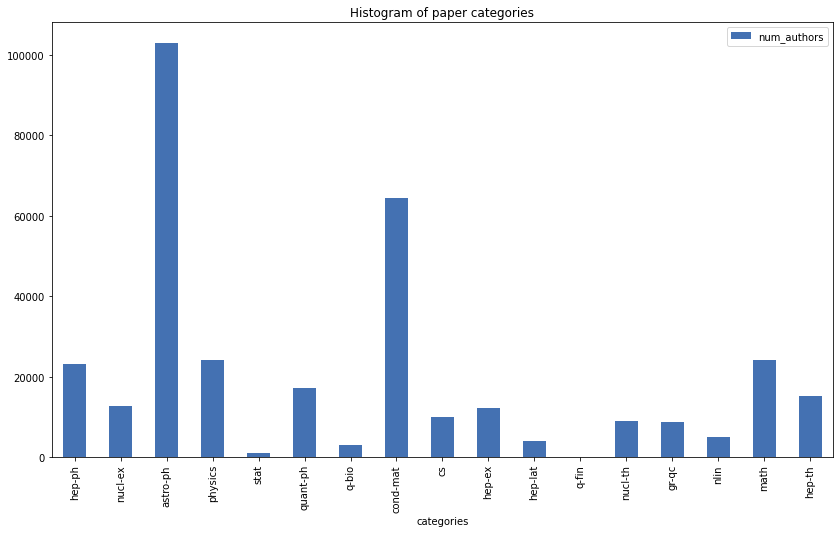

In [102]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
toplot = author_cat[["categories","num_authors"]]
toplot.set_index("categories", inplace = True)
cm = plt.cm.get_cmap("RdYlBu_r")
cNorm  = colors.Normalize(vmin=0, vmax=toplot["num_authors"].min())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
a= toplot.plot(kind='bar',figsize=(14,8),title="Histogram of paper categories", color=scalarMap.to_rgba(np.log2(toplot["num_authors"])))